In [53]:
import pandas as pd #데이터 조작 및 분석
import numpy as np #행렬 및 수치 계산
import scipy as sp #데이터를 조작, 시각화
import pingouin as pg #통계분석
import scikit_posthocs #사후분석 패키지 pip install scikit-posthocs
from scipy import stats #수치해석

In [11]:
df=pd.read_csv('datasets/Ashopping.csv', sep=',', encoding='CP949')
df1=df[['구매유형','총_매출액']]
pd.options.display.float_format='{:.3f}'.format # 소수점 자리수 3자리

분산분석  
독립변수 : 명목형 변수    
종속변수 : 수치형 변수

#### 일원분산분석  
독립변수와 종속변수가 각각 하나인 경우의 분산분석  
분산분석에서 가설검정을 위해 사용하는 검정통계량 F값은 집단내 분산 대비 집단간 분산이 몇배 더 큰지를 나타내는 값.  
따라서 F값이 F의 임계치보다 크다면 집단간의 차이가 충분히 크다는 의미이다.  

귀무가설(H0):A쇼핑 고객의 구매유형에 따른 총 매출의 차이는 없다.  
대립가설(H1):A쇼핑 고객은 적어도 1개의 구매유형이 다른 구매유형과 총 매출액 차이가 존재한다.

In [29]:
구매유형=[]
for i in range(1,5,1) :
    구매유형.append(df1[df1.구매유형==i].총_매출액)
sp.stats.levene(구매유형[0],구매유형[1],구매유형[2],구매유형[3])

LeveneResult(statistic=61.83834278363635, pvalue=1.1483869977419955e-36)

분산분석을 하기 전 먼저 등분산검정을 실시한다.  
구매유형간의 등분산 검정결과 F값은 61.83, 유의확률은 0.01미만으로 귀무가설이 기각되었다.  
즉, 4개 집단의 분산은 동일하지 않은 것으로 나타났다.

In [30]:
# Welch 일원분산분석 : 분산이 동일하지 않은 경우 대부분 사용
print(pg.welch_anova(dv='총_매출액',between='구매유형',data=df1))

  Source  ddof1   ddof2      F  p-unc   np2
0   구매유형      3 230.936 88.238  0.000 0.193


구매유형1:1회성 구매형, 구매유형2:실용적구매형, 구매유형3:명품구매형, 구매유형4:집중구매형

In [45]:
#사후분석 : 각 집단별 표본의 크기가 다르기때문에 scheffe 방법을 이용
df1['구매유형'].astype(str)
print(scikit_posthocs.posthoc_scheffe(df1,val_col='총_매출액',group_col='구매유형'))
#구매유형별 평균 총 매출액
print('\n',구매유형[0].mean(),'\n',구매유형[1].mean(),'\n',구매유형[2].mean(),'\n',구매유형[3].mean())

      4     2     1     3
4 1.000 0.000 0.805 0.000
2 0.000 1.000 0.000 0.008
1 0.805 0.000 1.000 0.000
3 0.000 0.008 0.000 1.000

 3403682.3255813955 
 9612645.078864353 
 11779839.652777778 
 4392794.395161291


일원분산분석 F값은 88.23, 유의확률은 0.01이하로 출력되었다.  
따라서, 'A쇼핑 고객은 적어도 1개의 구매유형은 다른 구매유형과 총 매출액 차이가 존재한다'는 대립가설을 채택한다.  
사후 분석결과, 유의확률 0.805인 구매유형1(1회성구매형)과 4(집중구매형)를 제외하고 나머지는 유의한 차이가 있는 것으로 나타났다.  
평균 총 매출액은 명품구매형>실용적구매형>집중구매형>1회성구매형 순으로 나타났다.

#### 이원분산분석   
독립변수가 2개, 독립변수가 종속변수에 미치는 영향 외에 독립변수간의 상호작용 효과를 추가적으로 판단해야함   
 - 등분산성 검정을 먼저 실시해야함 (일원분산분석에서 실시하였으므로 생략)

#### 구매유형에 따른 매출액 차이 가설   
귀무가설(H0):A쇼핑 고객의 구매유형에 따른 총 매출의 차이는 없다.   
대립가설(H1):A쇼핑 고객은 적어도 1개의 구매유형이 다른 구매유형과 총 매출액 차이가 존재한다.    
#### 거주지역에 따른 매출액 차이 가설   
귀무가설(H0):A쇼핑 고객의 거주지역에 따른 총 매출의 차이는 없다.   
대립가설(H1):A쇼핑 고객은 적어도 1개의 거주지역이 다른 거주지역과 총 매출액 차이가 존재한다.    
#### 독립변수간 상호작용에 대한 가설     
귀무가설(H0):구매유형과 거주지역의 상호작용 효과는 없다.     
대립가설(H1):구매유형과 거주지역의 상호작용 효과가 있다.

In [47]:
df=pd.read_csv('datasets/Ashopping.csv', sep=',', encoding='CP949')
df1=df[['총_매출액','구매유형','거주지역']]

In [48]:
#이원분산분석
print(pg.anova(dv='총_매출액',between=['구매유형','거주지역'],data=df1))

        Source                    SS      DF                   MS      F  \
0         구매유형  9339585236659000.000   3.000 3113195078886333.500 94.667   
1         거주지역 16139327054509704.000   6.000 2689887842418284.000 81.795   
2  구매유형 * 거주지역  3867936213048883.500  18.000  214885345169382.406  6.534   
3     Residual 32096439113329672.000 976.000   32885695812837.777    NaN   

   p-unc   np2  
0  0.000 0.225  
1  0.000 0.335  
2  0.000 0.108  
3    NaN   NaN  


C:\Users\SEC\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [43]:
#사후분석 : 각 집단별 표본의 크기가 다르기때문에 scheffe 방법을 이용
df1['구매유형'].astype(str)
df1['거주지역'].astype(str)
print(scikit_posthocs.posthoc_scheffe(df1,val_col='총_매출액',group_col='구매유형'))
print(scikit_posthocs.posthoc_scheffe(df1,val_col='총_매출액',group_col='거주지역'))
#구매유형, 거주지역별 평균 총 매출액
pd.pivot_table(df1, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)

      4     2     1     3
4 1.000 0.000 0.805 0.000
2 0.000 1.000 0.000 0.008
1 0.805 0.000 1.000 0.000
3 0.000 0.008 0.000 1.000
      6     4     5     7     3     2     1
6 1.000 0.008 0.002 0.000 0.019 0.339 0.988
4 0.008 1.000 1.000 0.000 0.978 0.980 1.000
5 0.002 1.000 1.000 0.000 0.935 0.965 1.000
7 0.000 0.000 0.000 1.000 0.000 0.000 0.412
3 0.019 0.978 0.935 0.000 1.000 1.000 1.000
2 0.339 0.980 0.965 0.000 1.000 1.000 1.000
1 0.988 1.000 1.000 0.412 1.000 1.000 1.000


거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,NaN,3281350.000,3002825.000,3041428.182,3637031.667,3712146.667,3864880.000
2,NaN,NaN,4215648.571,8278686.562,6590330.674,10226770.763,13513839.437
3,4906400.000,3215055.000,6809777.143,7965439.677,11046081.250,13768678.750,25451441.176
4,NaN,4034175.556,3720989.697,4229915.000,4272964.468,4749139.200,5138468.276


구매유형의 F값은 94.667, 거주지역의 F값은 81.795, 두 변수간의 상호작용 효과의 F값은 6.53이다.   
유의확률은 모두 0.01 이하로 출력되었다. 따라서 모든 대립가설을 채택하였다.   
→매출액은 구매유형, 거주지역에 따라 다르며 구매유형-거주지역 간의 상호작용이 유의하다.  
사후 분석결과 구매유형은 1과 4를 제외한 나머지 유형간의 총 매출액 차이가 유의하고,   
거주지역은 2-7, 3-6, 3-7, 4-6, 4-7, 5-6, 5-7, 6-7 의 차이가 유의하게 나타났다.   
특히, 거주지역7-구매유형3의 매출액이 높으므로, 해당 고객군을 위한 차별화 마케팅 전략수립이 필요하다.

#### 다변량 분산분석   
종속변수가 2개 이상인 경우 집단간의 평균 차이를 비교하기 위한 분석기법

종속변수의 상관관계를 파악 후 상관관계가 없으면 단일변량분산분석 방법으로 각각 진행,  
상관관계가 있으면 다변량 분산분석을 진행한다.

H0(귀무가설) = A쇼핑고객의 구매유형, 거주지역에 따른 방문빈도, 총 매출액의 차이는 없다.  
H1(대립가설) = A쇼핑고객의 구매유형, 거주지역에 따른 방문빈도, 총 매출액의 차이는 있다.  

In [51]:
#종속변수의 상관관계 분석 : 방문빈도 - 총매출액
df1=df[['총_매출액','방문빈도']]
df1.head()

,총_매출액,방문빈도
0,4007080,17
1,3168400,14
2,2680780,18
3,5946600,17
4,13745950,73


In [54]:
print(stats.pearsonr(df1.총_매출액, df1.방문빈도))

(0.6311706453193395, 3.051960449687332e-112)


상관계수가 0.63이며, 유의수준은 0.01이하이므로 유의하다고 해석할 수 있다.    
즉, 유의미한 양의 상관성이 있음을 알 수 있다.    
→ 종속변수 간 상관관계가 있으므로 다변량분산분석을 진행한다.

In [57]:
from statsmodels.multivariate.manova import MANOVA #다변량 통계

In [58]:
df1=df[['총_매출액','방문빈도','구매유형','거주지역']]
pd.options.display.float_format='{:.3f}'.format

In [59]:
print(MANOVA.from_formula('방문빈도+총_매출액~구매유형+거주지역', data=df1).mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9578 2.0000 996.0000 21.9327 0.0000
          Pillai's trace 0.0422 2.0000 996.0000 21.9327 0.0000
  Hotelling-Lawley trace 0.0440 2.0000 996.0000 21.9327 0.0000
     Roy's greatest root 0.0440 2.0000 996.0000 21.9327 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          구매유형          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8248 2.0000 996.0000 105.8119 0.0000
         Pillai's trace 0.1752 2.0000 996.0000 105.8119 0.0000
 Hotelling-

다변량분산분석 전체 모형의 적합성, 그리고 거주지역과 구매유형에 대한 각각의 다변량 분산 모형의 결과가 순서대로 출력되었다.  
모두 유의확률 0.01 이하로 모형이 유의미하다.  
  

Wilks'lambda : 집단내분산/총분산으로 값이 작을수록 유의  
Pillai's trace : 집단간분산/총분산으로 값이 클수록 유의   
Hotelling-Lawley trace : 집단간분산/집단내분산으로 값이 클수록 유의  
Roy's greatest root : 첫번째 변수에 근거하여 집단간분산/총분산

In [61]:
#사후분석
df1['구매유형'].astype(str)
df1['거주지역'].astype(str)
print('구매유형 총매출액 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형', sort=True))
print('\n거주지역 총매출액 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='거주지역', sort=True))
print('\n구매유형 방문빈도 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='구매유형', sort=True))
print('\n거주지역 방문빈도 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='거주지역', sort=True))

구매유형 총매출액 사후분석 
        1     2     3     4
1 1.000 0.000 0.000 0.805
2 0.000 1.000 0.008 0.000
3 0.000 0.008 1.000 0.000
4 0.805 0.000 0.000 1.000

거주지역 총매출액 사후분석 
        1     2     3     4     5     6     7
1 1.000 1.000 1.000 1.000 1.000 0.988 0.412
2 1.000 1.000 1.000 0.980 0.965 0.339 0.000
3 1.000 1.000 1.000 0.978 0.935 0.019 0.000
4 1.000 0.980 0.978 1.000 1.000 0.008 0.000
5 1.000 0.965 0.935 1.000 1.000 0.002 0.000
6 0.988 0.339 0.019 0.008 0.002 1.000 0.000
7 0.412 0.000 0.000 0.000 0.000 0.000 1.000

구매유형 방문빈도 사후분석 
        1     2     3     4
1 1.000 0.000 0.075 0.030
2 0.000 1.000 0.000 0.000
3 0.075 0.000 1.000 0.998
4 0.030 0.000 0.998 1.000

거주지역 방문빈도 사후분석 
        1     2     3     4     5     6     7
1 1.000 1.000 1.000 0.949 0.878 0.451 0.018
2 1.000 1.000 0.999 0.604 0.303 0.005 0.000
3 1.000 0.999 1.000 0.370 0.040 0.000 0.000
4 0.949 0.604 0.370 1.000 0.913 0.000 0.000
5 0.878 0.303 0.040 0.913 1.000 0.000 0.000
6 0.451 0.005 0.000 0.000 0.000 1.000 0.000
7 0.0

In [66]:
#3. 구매유형, 거주지역별 평균 총매출액, 구매유형, 거주지역별 평균 방문빈도
평균총매출액 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균총매출액\n',평균총매출액)
평균방문빈도 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='방문빈도', aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균방문빈도\n',평균방문빈도)


구매유형, 거주지역별 평균총매출액
 거주지역           1           2           3           4            5  \
구매유형                                                                
1            NaN 3281350.000 3002825.000 3041428.182  3637031.667   
2            NaN         NaN 4215648.571 8278686.562  6590330.674   
3    4906400.000 3215055.000 6809777.143 7965439.677 11046081.250   
4            NaN 4034175.556 3720989.697 4229915.000  4272964.468   

거주지역            6            7  
구매유형                            
1     3712146.667  3864880.000  
2    10226770.763 13513839.437  
3    13768678.750 25451441.176  
4     4749139.200  5138468.276  

구매유형, 거주지역별 평균방문빈도
 거주지역     1      2      3      4      5      6      7
구매유형                                                
1      NaN  8.000  8.667 10.818 10.222  9.667 10.000
2      NaN    NaN 29.143 42.312 39.022 48.212 58.845
3    7.750  5.000  7.929 11.903 15.350 20.438 40.765
4      NaN 12.778 12.485 17.277 18.000 18.768 19.966


사후분석 결과는,
구매유형 기준으로 구매유형1-구매유형4를 제외한 나머지 유형간의 총 매출액 차이가 유의하고,  
거주지역 기준으로 3-6, 4-6, 5-6, 2-7, 3-7, 4-7, 5-7, 6-7 그룹간의 총 매출액 차이가 유의하게 나타났다.   
또한, 구매유형 기준으로 구매유형1-구매유형3, 구매유형3-구매유형4를 제외한 나머지 유형간의 방문빈도 차이가 유의하고,  
거주지역 기준으로는 3-5, 2-6, 3-6, 4-6, 5-6, 1-7, 2-7, 3-7, 4-7, 5-7, 6-7 그룹간의 방문빈도 차이가 유의하게 나타났다.  
마지막으로, 구매유형과 거주지역별 총 매출액과 방문빈도를 테이블로 나타내었다.

In [68]:
#시각화
import matplotlib
import matplotlib.pyplot as plt 
matplotlib.rcParams['font.family']='Malgun Gothic' #한글깨짐방지

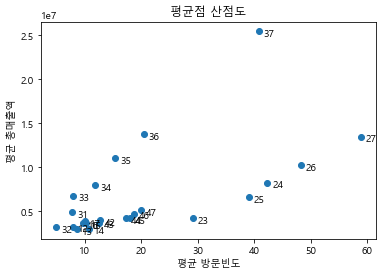

In [90]:
X=np.hstack(평균방문빈도.values[0:4])
Y=np.hstack(평균총매출액.values[0:4])
labels = []
for i in range(1,5,1):
    for j in range(1,8,1):
        labels.append(str(i)+str(j))

for label, x_count, y_count in zip(labels, X, Y):
    plt.annotate(label,xycoords='data',
                textcoords='offset points',
                xy=(x_count, y_count), 
                xytext=(5,-5) ) 

plt.title('평균점 산점도') #차트 제목
plt.xlabel('평균 방문빈도') # X축 이름
plt.ylabel('평균 총매출액') # Y축 이름
plt.plot(X, Y,'o')

평균 총매출액이 가장 높은것은 구매유형3, 거주지역7이고,  
평균 방문빈도가 가장 높은건은 구매유형2, 거주지역7이다.  

#### 공분산 분석  
독립변수 : 수치형 변수 존재  
종속변수 : 수치형 변수  
일반적인 분산분석에서 종속변수에 영향을 줄수 있는 연속형 외생변수의 효과를 제거하고,    
순수하게 집단 간 종속변수의 평균 차이를 분석

H0(귀무가설)=방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 없다.   
H1(대립가설)=방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 있다.

In [92]:
df1=df[['총_매출액','방문빈도','거주지역']]

In [94]:
# 공분산분석
print('공분산분석 결과\n', pg.ancova(dv='총_매출액',between='거주지역',covar='방문빈도',data=df1))
# 일원분산분석
print('\n일원분산분석 결과\n',pg.anova(dv='총_매출액',between=['거주지역'],data=df1))

공분산분석 결과
      Source                    SS   DF       F  p-unc   np2
0      거주지역   696696841274974.250    6   4.046  0.001 0.024
1      방문빈도 13701443685723020.000    1 477.393  0.000 0.325
2  Residual 28470960329516344.000  992     NaN    NaN   NaN

일원분산분석 결과
   Source  ddof1  ddof2      F  p-unc   np2
0   거주지역      6    993 24.759  0.000 0.130


방문빈도를 통제한 거주지역에 따른 총 매출액의 공분산분석은 유의하고, F값은 4.046이다.  
즉, 방문빈도를 통제하지 않은 분산분석을 했을때 F값은 24.759로 훨씬 크다.  
방문빈도가 매출액에 영향을 준다는 의미이다.  
이는 거주지역에 따른 매출액의 차이를 고려할 때, 방문빈도를 통제하지 않으면 거주지역별 차이가 과대 평가될 수 있다는 것을 의미한다.